In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from solarposition import *
from shadowingfunction_wallheight_13 import shadowingfunction_wallheight_13

# Load Numpy array

In [2]:
# dsm is a map that reprents elevation information 
dsm = np.load('./dsm_local_array.npy')
dsm = np.nan_to_num(dsm, nan=0)

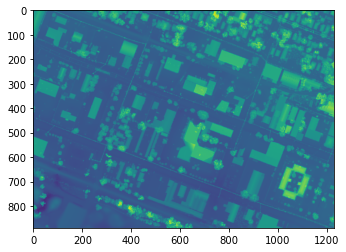

In [3]:
f, ax = plt.subplots()

plt.imshow(dsm, cmap='viridis')

plt.show()

# Sun's position

In [4]:
# Sun position
# https://github.com/pvlib/pvlib-python

lon = -95.30052
lat = 29.73463

utc_offset= -6

# Create a date range from 6:00 to 20:00 with a 10-minute interval
timestamps = pd.date_range('2023-09-12 11:00', '2023-09-12 11:10', freq='30T')

# Create a DataFrame using the timestamps as a column
df_solar_data = pd.DataFrame({'TimeStamp': timestamps})



# UTC time
df_solar_data['TimeStamp'] = pd.DatetimeIndex(df_solar_data['TimeStamp']) - pd.DateOffset(hours=utc_offset)

# To_Datetime
df_solar_data["TimeStamp"] = df_solar_data["TimeStamp"].apply(pd.to_datetime)
df_solar_data.set_index("TimeStamp", inplace = True)

# Add time index
df_solar_data["TimeStamp"] = df_solar_data.index

df_solar_data.head()

,TimeStamp
TimeStamp,
2023-09-12 17:00:00,2023-09-12 17:00:00


In [5]:
# Get_sun's position df
df_solar = get_solarposition(df_solar_data.index, lat, lon)

# Add time index
df_solar['TimeStamp'] = pd.DatetimeIndex(df_solar.index) + pd.DateOffset(hours=utc_offset)

df_solar = df_solar[['TimeStamp', 'apparent_zenith', 'zenith', 'apparent_elevation', 'elevation',
                   'azimuth', 'equation_of_time']]

# To_Datetime
df_solar["TimeStamp"] = df_solar["TimeStamp"].apply(pd.to_datetime)
df_solar.set_index("TimeStamp", inplace = True)

df_solar.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
TimeStamp,,,,,,
2023-09-12 11:00:00,31.513944,31.524265,58.486056,58.475735,140.740018,3.713015


In [6]:
df_solar["TimeStamp"] = df_solar.index
df_solar = df_solar[['TimeStamp', 'elevation', 'zenith', 'azimuth']]

df_solar = df_solar.rename(columns={"elevation": "Elevation","azimuth": "Azimuth", "zenith": "Zenith"})

df_solar.head()

,TimeStamp,Elevation,Zenith,Azimuth
TimeStamp,,,,
2023-09-12 11:00:00,2023-09-12 11:00:00,58.475735,31.524265,140.740018


# Walls and Height

In [7]:
# Temporally !
scale = 1
walls = np.zeros((dsm.shape[0], dsm.shape[1]))
dirwalls = np.zeros((dsm.shape[0], dsm.shape[1]))

walls.shape

(889, 1228)

# Shadow

11 0


Text(0.5, 1.0, '11:00')

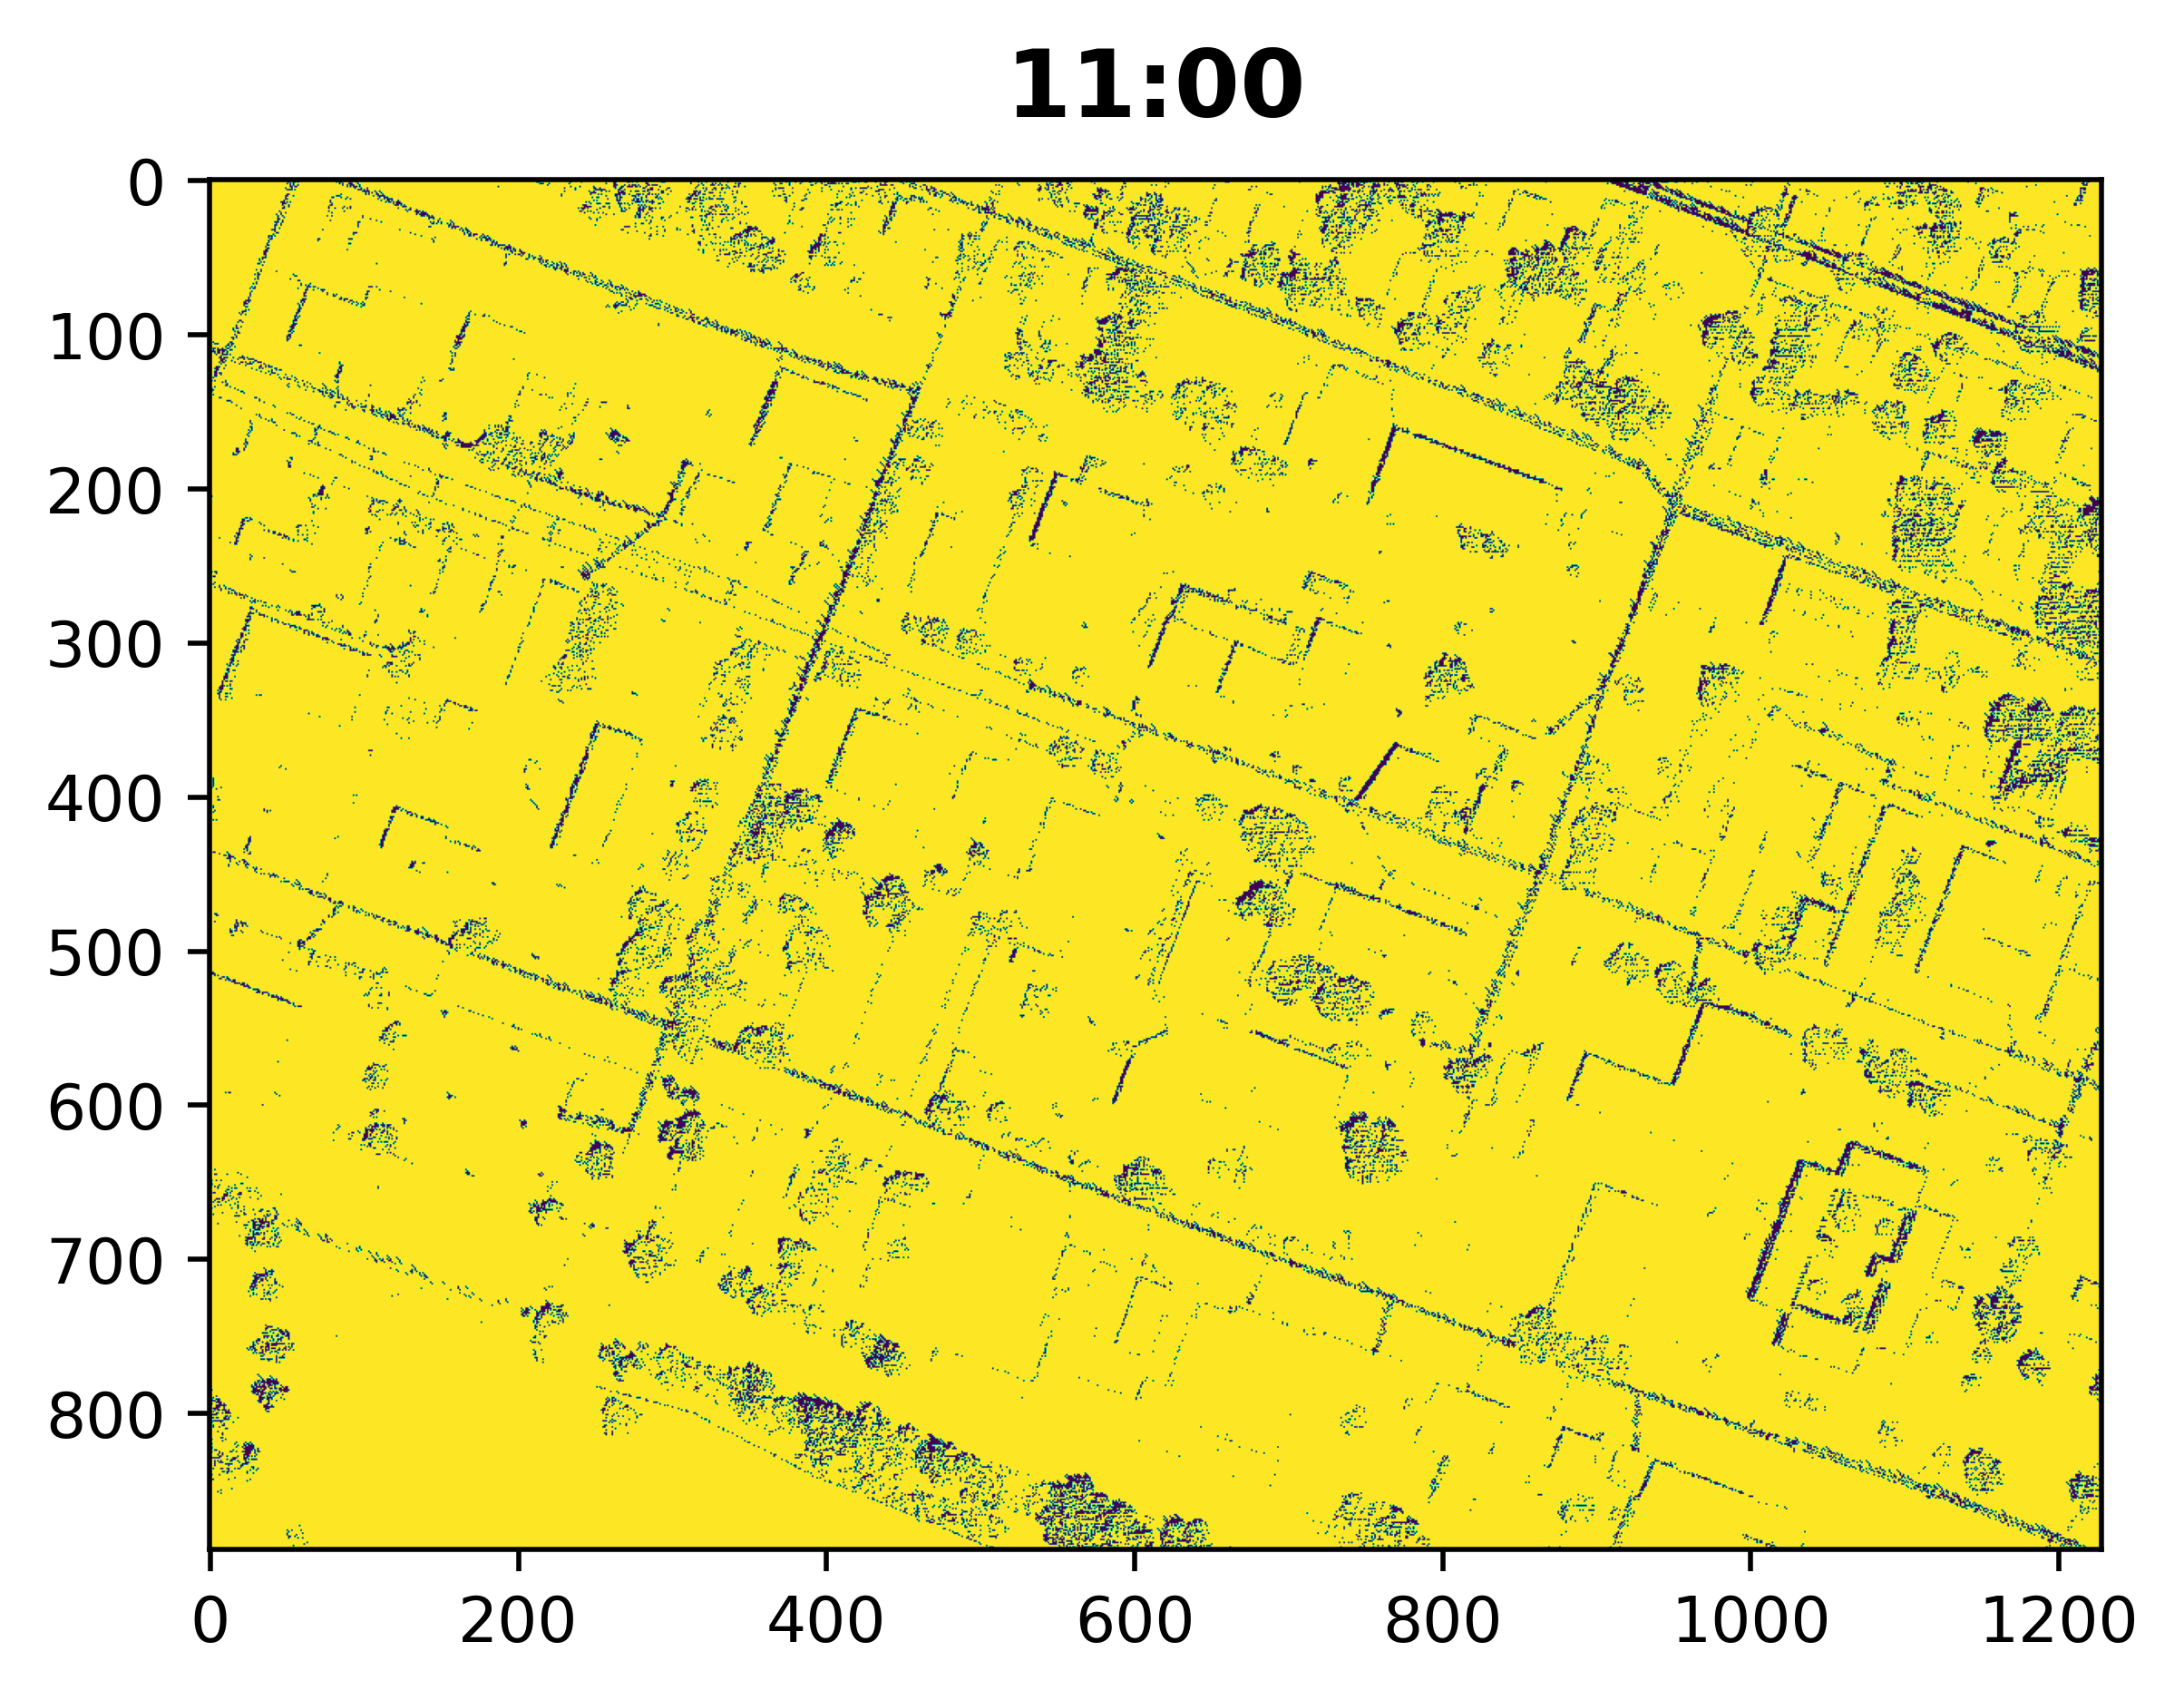

In [8]:
i = 0

altitude = df_solar['Elevation'][i]
azimuth = df_solar['Azimuth'][i]

hour = df_solar.index[i].hour
minute = df_solar.index[i].minute

print(hour, minute)

sh, wallsh, wallsun, facesh, facesun = shadowingfunction_wallheight_13(dsm, azimuth, altitude, scale, walls, dirwalls * np.pi / 180.)

f, ax = plt.subplots(dpi=500)

plt.imshow(sh, cmap='viridis')

plt.title("%2s" % str(hour).zfill(2) + ":%2s"% str(minute).zfill(2), pad =10, fontsize=15, color="black", weight='bold' )


In [9]:
sh.shape

(889, 1228)

In [10]:
df = pd.DataFrame(sh)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
